b) Visualisasi untuk melihat
jumlah kemenangan pada kolom `Winner` berdasarkan umur petinju

Drop baris yang memiliki nilai null di kolom `B_age` atau `R_age`

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("UFC_train.csv")

df.dropna(subset=['B_age'], inplace=True)
df.dropna(subset=['R_age'], inplace=True)

df[['R_fighter','B_fighter','R_age','B_age','Winner']]

,R_fighter,B_fighter,R_age,B_age,Winner
0,Joe Riggs,Joe Doerksen,21.0,26.0,Red
1,Jorge Masvidal,Al Iaquinta,30.0,27.0,Blue
2,Dan Stittgen,Stephen Thompson,31.0,28.0,Blue
3,Josh Koscheck,Johny Hendricks,34.0,28.0,Blue
4,John Dodson,Manvel Gamburyan,31.0,34.0,Red
...,...,...,...,...,...
5405,Matt Frevola,Luis Pena,29.0,26.0,Red
5406,Demian Maia,Rick Story,34.0,28.0,Red
5407,Eduardo Garagorri,Humberto Bandenay,30.0,24.0,Red
5408,Danny Castillo,Edson Barboza,34.0,27.0,Blue


In [20]:
df.shape

(5230, 144)

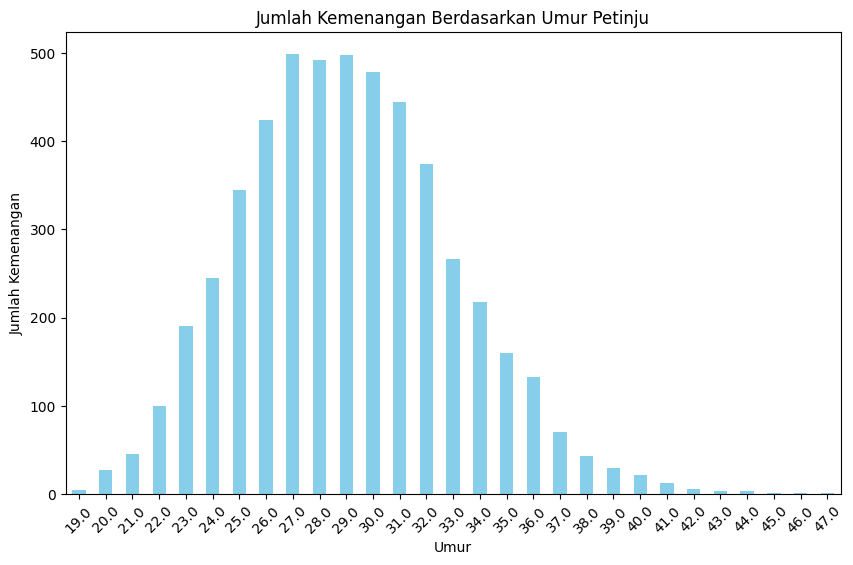

In [21]:
# Menghitung jumlah kemenangan berdasarkan umur petinju sesuai dengan pemenang Red dan Blue
red_winners_by_age = df[df['Winner'] == 'Red'].groupby('R_age')['Winner'].count()
blue_winners_by_age = df[df['Winner'] == 'Blue'].groupby('B_age')['Winner'].count()

# Menggabungkan hasil penghitungan
winners_by_age = red_winners_by_age.add(blue_winners_by_age, fill_value=0)
winners_by_age = winners_by_age.sort_index()

# Membuat visualisasi
plt.figure(figsize=(10, 6))
winners_by_age.plot(kind='bar', color='skyblue')
plt.title('Jumlah Kemenangan Berdasarkan Umur Petinju')
plt.xlabel('Umur')
plt.ylabel('Jumlah Kemenangan')
plt.xticks(rotation=45)
plt.show()

Explorasi Petinju dengan kemenangan terbanyak

In [22]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df) * 100
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [23]:
df = pd.read_csv("UFC_train.csv")
print("Jumlah duplikasi data : " + str(df.duplicated().sum()) + "\n")

df[['R_fighter','B_fighter', 'Winner']]

blue_winner = df.loc[df['Winner'] == 'Blue']
red_winner = df.loc[df['Winner'] == 'Red']
draws = df.loc[df['Winner'] == 'Draw']

total_draws = draws['B_fighter'].value_counts().add(draws['R_fighter'].value_counts(), fill_value=0)

highest_win = blue_winner['B_fighter'].value_counts().add(red_winner['R_fighter'].value_counts(), fill_value=0)
highest_win.sort_values(inplace=True, ascending=False)

losses = blue_winner['R_fighter'].value_counts().add(red_winner['B_fighter'].value_counts(), fill_value=0)
losses.sort_values(inplace=True, ascending=False)

highest_winner_losses = losses.loc[highest_win.index[0]]
highest_winner_draws = total_draws.loc[highest_win.index[0]]
highest_winner_winrate = highest_win[0] / (highest_winner_losses + highest_win[0] + highest_winner_draws) * 100

print(f"Orang dengan kemenangan terbanyak adalah {highest_win.index[0]} dengan {highest_win[0]} kemenangan dan persentase kemenangan {highest_winner_winrate} %\n")

highest_loser_wins = highest_win.loc[losses.index[0]]
highest_loser_draws = total_draws.loc[losses.index[0]]
highest_loser_winrate = highest_loser_wins / (highest_loser_wins + losses[0] + highest_loser_draws) * 100

print(f"Orang dengan kekalahan terbanyak adalah {losses.index[0]} dengan {losses[0]} kekalahan dan persentase kemenangan {highest_loser_winrate} %")

Jumlah duplikasi data : 0

Orang dengan kemenangan terbanyak adalah Donald Cerrone dengan 23.0 kemenangan dan persentase kemenangan 65.71428571428571 %

Orang dengan kekalahan terbanyak adalah Jeremy Stephens dengan 15.0 kekalahan dan persentase kemenangan 44.827586206896555 %


C:\Users\user\AppData\Local\Temp\ipykernel_20120\4082365546.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_winner_winrate = highest_win[0] / (highest_winner_losses + highest_win[0] + highest_winner_draws) * 100
C:\Users\user\AppData\Local\Temp\ipykernel_20120\4082365546.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Orang dengan kemenangan terbanyak adalah {highest_win.index[0]} dengan {highest_win[0]} kemenangan dan persentase kemenangan {highest_winner_winrate} %\n")
C:\Users\user\AppData\Local\Temp\ipykernel_20120\4082365546.py:26: FutureWarning: Series.__getitem__ treating keys as posi

Jumlah duplikasi data : 0



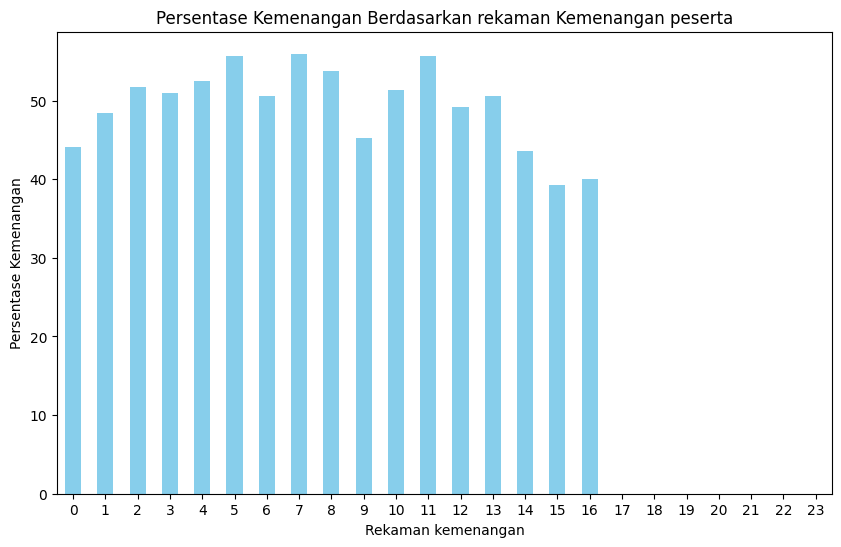

In [28]:
#TODO: Bikin grafik jumlah menang berdasarkan record kemenangan peserta sebelumnya
df = pd.read_csv("UFC_train.csv")
print("Jumlah duplikasi data : " + str(df.duplicated().sum()) + "\n")

df = df[['R_wins','B_wins', 'Winner']]
blue_winner = df.loc[df['Winner'] == 'Blue']
red_winner = df.loc[df['Winner'] == 'Red']
draw = df.loc[df['Winner'] == 'Draw']

total_draw = draw['B_wins'].value_counts().add(draw['R_wins'].value_counts(), fill_value=0)
blue_win_count = blue_winner['B_wins'].value_counts()
blue_loss_count = blue_winner['R_wins'].value_counts()
red_win_count = red_winner['R_wins'].value_counts()
red_loss_count = red_winner['B_wins'].value_counts()
total_win_count = blue_win_count.add(red_win_count, fill_value=0)
total_loss_count = blue_loss_count.add(red_loss_count, fill_value=0)
total_win_rate = total_win_count / (total_win_count + total_loss_count + total_draw) * 100

# Membuat visualisasi
plt.figure(figsize=(10, 6))
total_win_rate.plot(kind='bar', color='skyblue')
plt.title('Persentase Kemenangan Berdasarkan rekaman Kemenangan peserta')
plt.xlabel('Rekaman kemenangan')
plt.ylabel('Persentase Kemenangan')
plt.xticks(rotation=0)
plt.show()

c)


Dari informasi yang didapatkan di atas, fitur-fitur yang kemungkinan memiliki relasi dengan fitur panjang jangkauan lengan petinju adalah fitur-fitur yang mendeskripsikan fisik dari petinju. Fitur-fitur ini adalah :  
- B_Height_cms
- B_Weight_lbs
- B_age

Adapun juga fitur lain yang tidak mendeskripsikan fisik, tetapi dapat memengaruhi panjang jangkauan lengan petinju seperti :
- B_Stance
- weight_class

In [25]:
df = pd.read_csv("UFC_train.csv")

reach_df = df[["B_fighter", "B_Height_cms", "B_Weight_lbs", "B_age", "B_Stance", "weight_class", "B_Reach_cms"]]

reach_df.head()

,B_fighter,B_Height_cms,B_Weight_lbs,B_age,B_Stance,weight_class,B_Reach_cms
0,Joe Doerksen,182.88,185.0,26.0,Orthodox,Middleweight,190.50
1,Al Iaquinta,177.80,155.0,27.0,Orthodox,Lightweight,177.80
2,Stephen Thompson,182.88,170.0,28.0,Orthodox,Welterweight,190.50
3,Johny Hendricks,175.26,185.0,28.0,Southpaw,Welterweight,175.26
4,Manvel Gamburyan,165.10,135.0,34.0,Orthodox,Bantamweight,170.18


In [26]:
# Drop B_Reach_cms null values
print(reach_df.isnull().sum())
reach_df = reach_df[reach_df['B_Reach_cms'].notna()]
print(reach_df.isnull().sum())

B_fighter         0
B_Height_cms     10
B_Weight_lbs      8
B_age           161
B_Stance         64
weight_class      0
B_Reach_cms     810
dtype: int64
B_fighter       0
B_Height_cms    2
B_Weight_lbs    0
B_age           8
B_Stance        7
weight_class    0
B_Reach_cms     0
dtype: int64


In [27]:
# Get correlation matrix of reach_df for continuous variables
corr = reach_df.corr()

# Plot correlation matrix
sns.heatmap(corr, annot=True, cmap='Reds')

ValueError: could not convert string to float: 'Joe Doerksen'

<AxesSubplot:xlabel='B_Stance', ylabel='B_Reach_cms'>

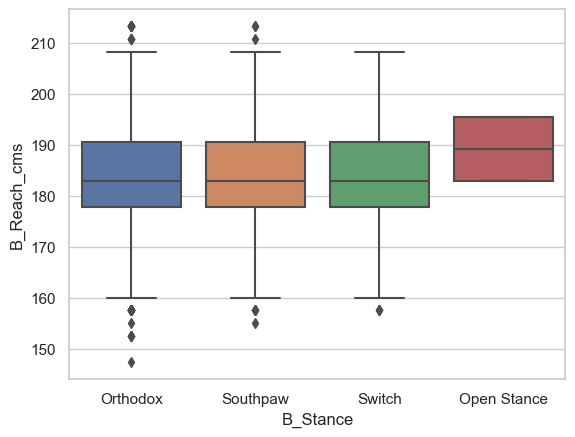

In [ ]:
# Boxplot of B_Reach_cms relative to B_Stance
sns.boxplot(x="B_Stance", y="B_Reach_cms", data=reach_df)

<AxesSubplot:xlabel='weight_class', ylabel='B_Reach_cms'>

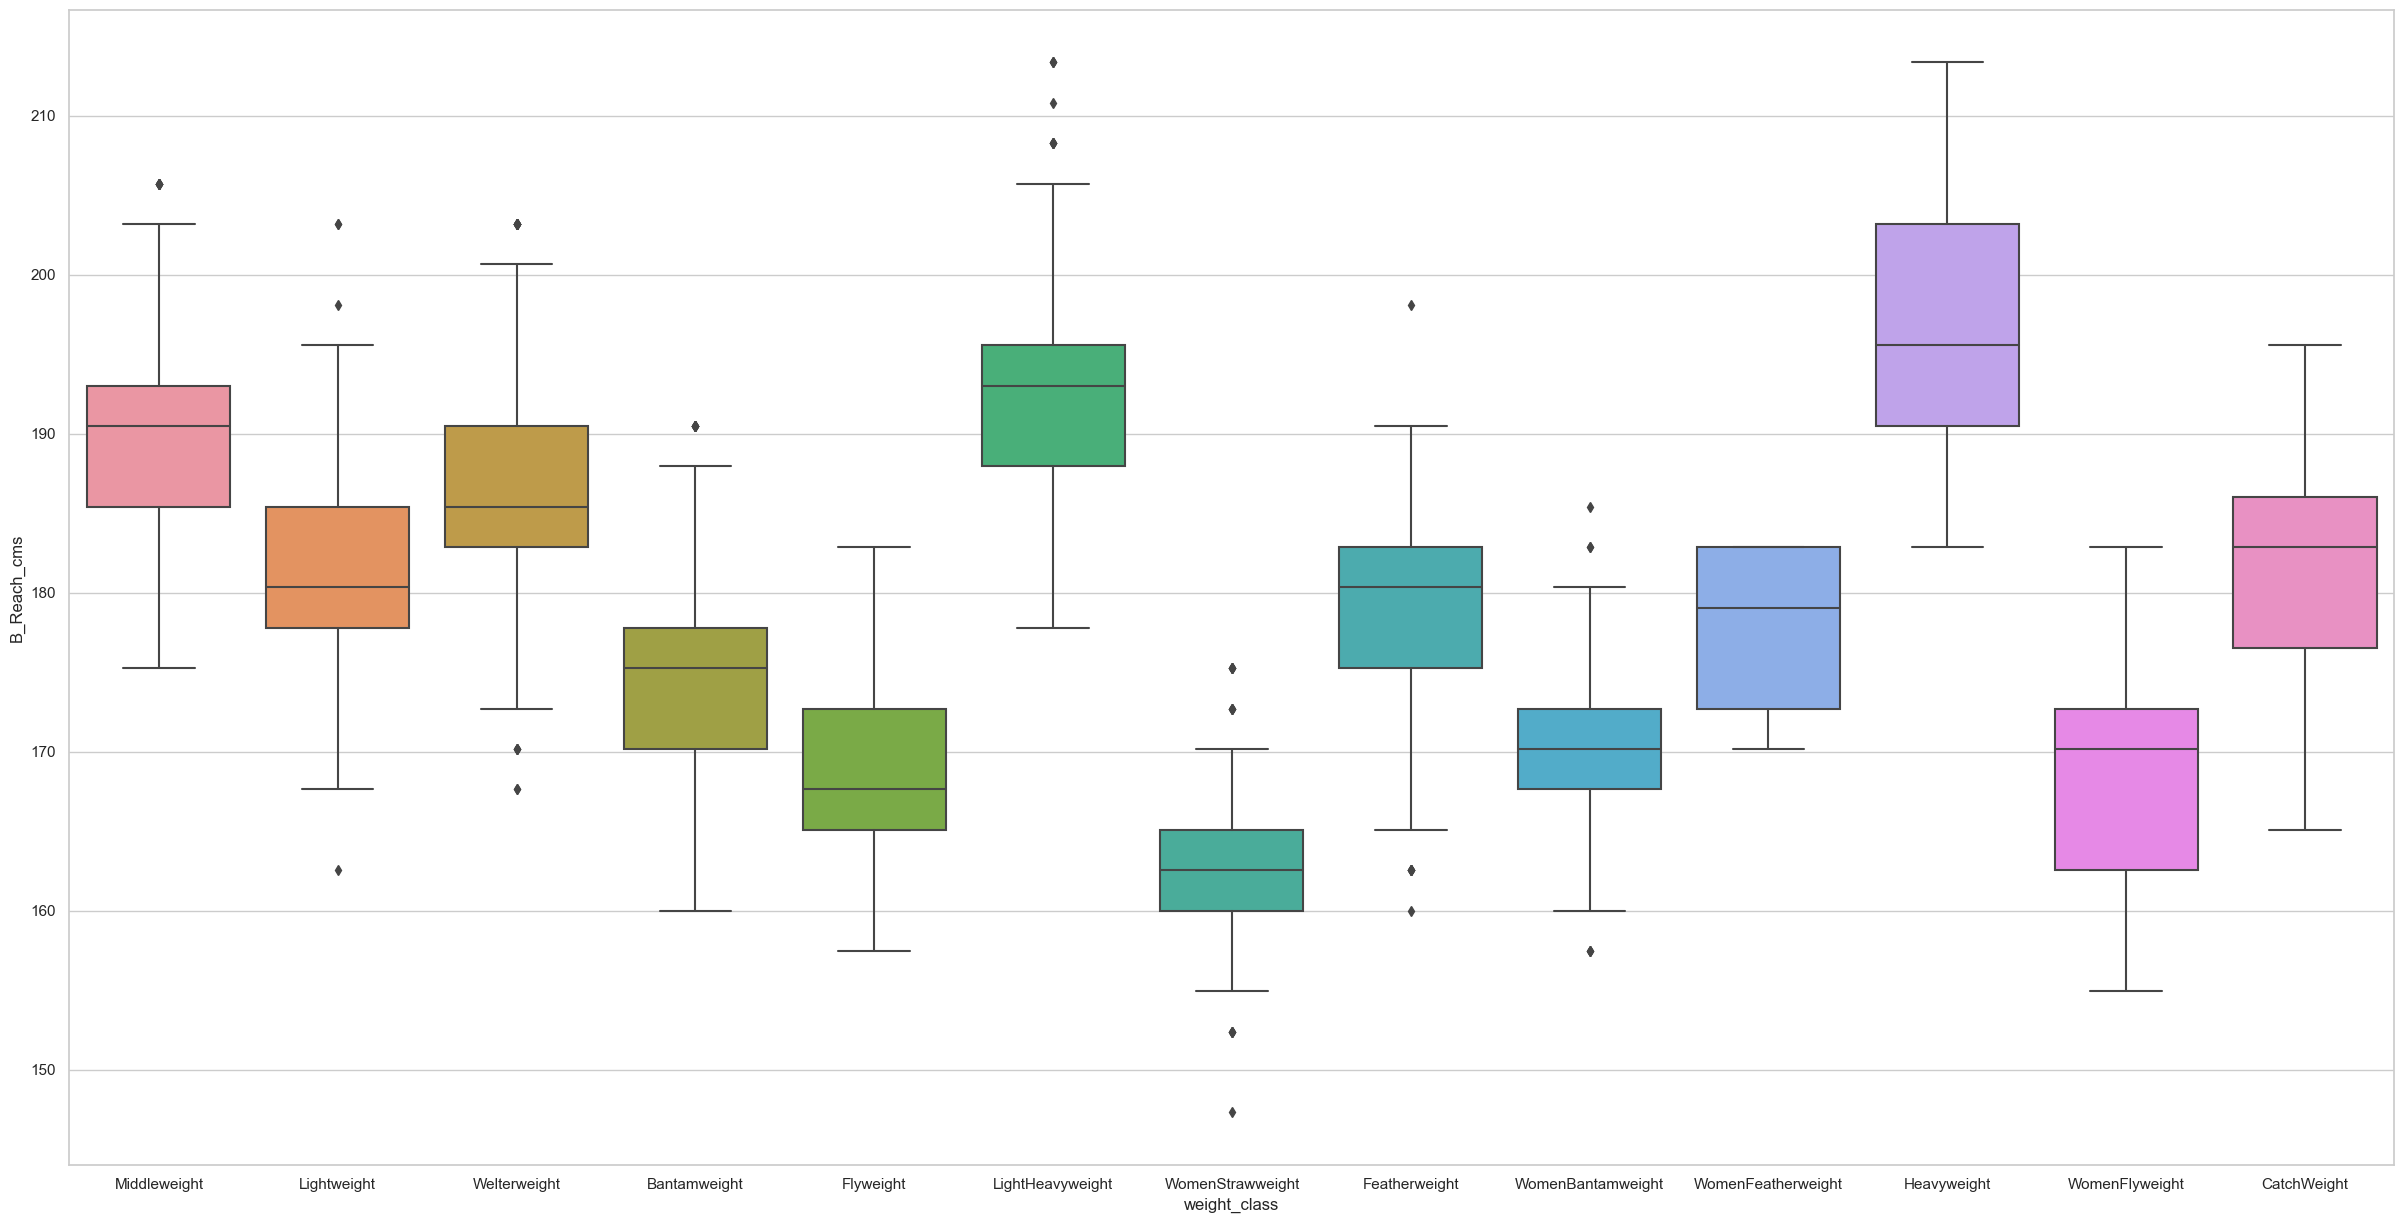

In [ ]:
# Boxplot of B_Reach_cms relative to weight_class and enlarge the plot
plt.figure(figsize=(30, 15))
sns.boxplot(x="weight_class", y="B_Reach_cms", data=reach_df)

Pada tahun berapakah yang memiliki UFC Fight Card terbanyak dari rentang tahun 1994-2021


In [ ]:
df = pd.read_csv('UFC_train.csv')

df.head()

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner
0,Joe Riggs,Joe Doerksen,Steve Mazzagatti,2004-08-21,"Las Vegas, Nevada, USA",False,Middleweight,NaN,NaN,NaN,...,0,0,0,Southpaw,182.88,177.80,185.0,26.0,21.0,Red
1,Jorge Masvidal,Al Iaquinta,Keith Peterson,2015-04-04,"Fairfax, Virginia, USA",False,Lightweight,1.156250,0.000000,0.394141,...,0,1,0,Orthodox,180.34,187.96,170.0,27.0,30.0,Blue
2,Dan Stittgen,Stephen Thompson,Josh Rosenthal,2012-02-04,"Las Vegas, Nevada, USA",False,Welterweight,NaN,NaN,NaN,...,0,0,0,Orthodox,185.42,NaN,170.0,28.0,31.0,Blue
3,Josh Koscheck,Johny Hendricks,Kevin Mulhall,2012-05-05,"East Rutherford, New Jersey, USA",False,Welterweight,0.695312,0.000000,0.783359,...,6,3,0,Orthodox,177.80,185.42,170.0,28.0,34.0,Blue
4,John Dodson,Manvel Gamburyan,James Warring,2016-04-16,"Tampa, Florida, USA",False,Bantamweight,0.500000,0.266602,0.381462,...,3,0,1,Orthodox,160.02,167.64,135.0,34.0,31.0,Red


In [ ]:
df_date = df.copy()

# Convert 'date' column to datetime type
df_date['date'] = pd.to_datetime(df_date['date'])

# Define the date range
start_date = '1994-01-01'
end_date = '2021-12-31'

# Filter rows based on the date range
df_1994_2021 = df_date[(df_date['date'] >= start_date) & (df_date['date'] <= end_date)]
df_1994_2021.head()

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner
0,Joe Riggs,Joe Doerksen,Steve Mazzagatti,2004-08-21,"Las Vegas, Nevada, USA",False,Middleweight,NaN,NaN,NaN,...,0,0,0,Southpaw,182.88,177.80,185.0,26.0,21.0,Red
1,Jorge Masvidal,Al Iaquinta,Keith Peterson,2015-04-04,"Fairfax, Virginia, USA",False,Lightweight,1.156250,0.000000,0.394141,...,0,1,0,Orthodox,180.34,187.96,170.0,27.0,30.0,Blue
2,Dan Stittgen,Stephen Thompson,Josh Rosenthal,2012-02-04,"Las Vegas, Nevada, USA",False,Welterweight,NaN,NaN,NaN,...,0,0,0,Orthodox,185.42,NaN,170.0,28.0,31.0,Blue
3,Josh Koscheck,Johny Hendricks,Kevin Mulhall,2012-05-05,"East Rutherford, New Jersey, USA",False,Welterweight,0.695312,0.000000,0.783359,...,6,3,0,Orthodox,177.80,185.42,170.0,28.0,34.0,Blue
4,John Dodson,Manvel Gamburyan,James Warring,2016-04-16,"Tampa, Florida, USA",False,Bantamweight,0.500000,0.266602,0.381462,...,3,0,1,Orthodox,160.02,167.64,135.0,34.0,31.0,Red


In [ ]:
# Eliminasi duplikat UFC Card pada hari tertentu
df_1994_2021.drop_duplicates()

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner
0,Joe Riggs,Joe Doerksen,Steve Mazzagatti,2004-08-21,"Las Vegas, Nevada, USA",False,Middleweight,NaN,NaN,NaN,...,0,0,0,Southpaw,182.88,177.80,185.0,26.0,21.0,Red
1,Jorge Masvidal,Al Iaquinta,Keith Peterson,2015-04-04,"Fairfax, Virginia, USA",False,Lightweight,1.156250,0.000000,0.394141,...,0,1,0,Orthodox,180.34,187.96,170.0,27.0,30.0,Blue
2,Dan Stittgen,Stephen Thompson,Josh Rosenthal,2012-02-04,"Las Vegas, Nevada, USA",False,Welterweight,NaN,NaN,NaN,...,0,0,0,Orthodox,185.42,NaN,170.0,28.0,31.0,Blue
3,Josh Koscheck,Johny Hendricks,Kevin Mulhall,2012-05-05,"East Rutherford, New Jersey, USA",False,Welterweight,0.695312,0.000000,0.783359,...,6,3,0,Orthodox,177.80,185.42,170.0,28.0,34.0,Blue
4,John Dodson,Manvel Gamburyan,James Warring,2016-04-16,"Tampa, Florida, USA",False,Bantamweight,0.500000,0.266602,0.381462,...,3,0,1,Orthodox,160.02,167.64,135.0,34.0,31.0,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,Matt Frevola,Luis Pena,Herb Dean,2019-10-12,"Tampa, Florida, USA",False,Lightweight,0.125000,0.000000,0.481250,...,0,0,0,Orthodox,175.26,180.34,155.0,26.0,29.0,Red
5406,Demian Maia,Rick Story,Mario Yamasaki,2012-10-13,"Rio de Janeiro, Brazil",False,Welterweight,0.015625,0.000000,0.384980,...,1,5,0,Southpaw,185.42,182.88,170.0,28.0,34.0,Red
5407,Eduardo Garagorri,Humberto Bandenay,Osiris Maia,2019-08-10,"Montevideo, Uruguay",False,Featherweight,0.250000,0.250000,0.602500,...,0,0,0,Orthodox,175.26,177.80,145.0,24.0,30.0,Red
5408,Danny Castillo,Edson Barboza,Mike Beltran,2013-12-14,"Sacramento, California, USA",False,Lightweight,0.875000,0.125000,0.543125,...,1,0,0,Orthodox,175.26,180.34,155.0,27.0,34.0,Blue


In [ ]:
df_1994_2021['year'] = df_1994_2021['date'].dt.year
df_1994_2021['year']

0       2004
1       2015
2       2012
3       2012
4       2016
        ... 
5405    2019
5406    2012
5407    2019
5408    2013
5409    2009
Name: year, Length: 5410, dtype: int64

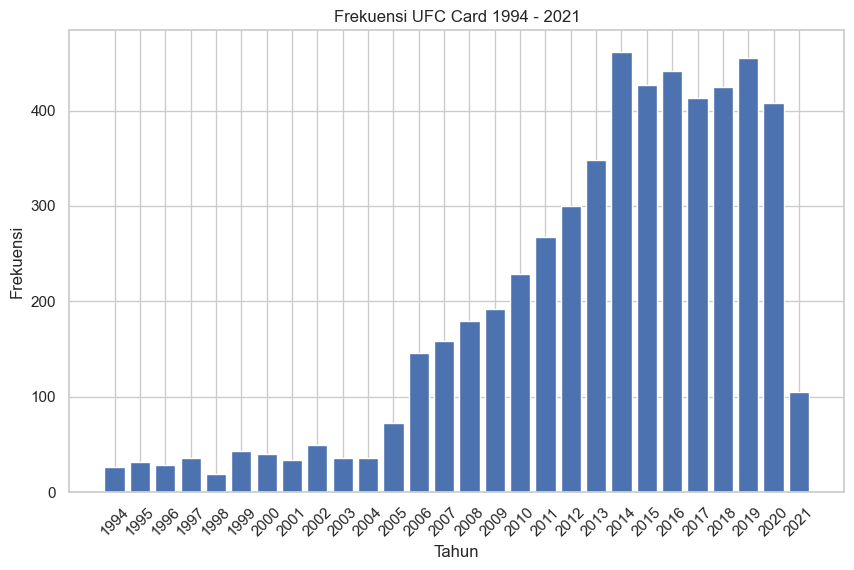

In [ ]:
ufc_card_count_per_year = df_1994_2021['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(ufc_card_count_per_year.index, ufc_card_count_per_year.values)
plt.xticks(ufc_card_count_per_year.index, rotation=45)
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.title('Frekuensi UFC Card 1994 - 2021')
plt.show()

In [ ]:
ufc_card_count_per_year.max()

461

## Data Pre-Processing

### Handle Duplicate Values

In [ ]:
print("Jumlah duplikasi data : " + str(df.duplicated().sum()))

Jumlah duplikasi data : 0


### Handle Missing Values

In [ ]:
pd.options.display.max_rows = 999

check_null(df)

                              Total    Percent
R_Weight_lbs                      2   0.036969
R_Height_cms                      4   0.073937
B_Weight_lbs                      8   0.147874
B_Height_cms                     10   0.184843
R_Stance                         27   0.499076
Referee                          31   0.573013
R_age                            56   1.035120
B_Stance                         64   1.182994
B_age                           161   2.975970
R_Reach_cms                     375   6.931608
R_avg_BODY_att                  643  11.885397
R_avg_opp_HEAD_landed           643  11.885397
R_avg_opp_HEAD_att              643  11.885397
R_avg_HEAD_landed               643  11.885397
R_avg_HEAD_att                  643  11.885397
R_avg_opp_TD_landed             643  11.885397
R_avg_opp_TOTAL_STR_att         643  11.885397
R_avg_TD_landed                 643  11.885397
R_avg_TD_att                    643  11.885397
R_avg_opp_TOTAL_STR_landed      643  11.885397
R_avg_BODY_la

In [ ]:
# Check row with missing value in R_Weight_lbs column
missing_rows = df[df['R_Weight_lbs'].isnull()]

missing_rows

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner
3911,Frank Hamaker,Thaddeus Luster,John McCarthy,1994-03-11,"Denver, Colorado, USA",False,OpenWeight,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Red
5093,Jack Nilson,Saeed Hosseini,Joe Hamilton,1997-05-30,"Augusta, Georgia, USA",False,Lightweight,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Red


In [ ]:
# Drop all rows that have missing values
dropped_df = df.copy()

dropped_df = dropped_df.dropna()


In [ ]:
dropped_df.shape

(3480, 144)

### Handle Outlier

In [ ]:
# Get all numerical columns
numerical_columns = pre_processed_df.select_dtypes(include=['number'])

numerical_columns.columns

Index(['B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct',
       'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV',
       ...
       'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous',
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Height_cms', 'R_Reach_cms',
       'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=134)

In [ ]:
# Check outlier percentage
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [ ]:
outliers = dict(check_outlier(numerical_columns).sum())
print("\n\npercentage of outliers in each column:")
for key in outliers.keys():
    print(f"{key} = {outliers[key]/numerical_columns[key].shape[0] * 100}%")


Outlier pada tiap atribut:
B_avg_KD                         67
B_avg_opp_KD                    277
B_avg_SIG_STR_pct                91
B_avg_opp_SIG_STR_pct            82
B_avg_TD_pct                      0
B_avg_opp_TD_pct                 85
B_avg_SUB_ATT                   187
B_avg_opp_SUB_ATT               243
B_avg_REV                       577
B_avg_opp_REV                   524
B_avg_SIG_STR_att                75
B_avg_SIG_STR_landed             77
B_avg_opp_SIG_STR_att            92
B_avg_opp_SIG_STR_landed         97
B_avg_TOTAL_STR_att              54
B_avg_TOTAL_STR_landed           66
B_avg_opp_TOTAL_STR_att          63
B_avg_opp_TOTAL_STR_landed       80
B_avg_TD_att                    165
B_avg_TD_landed                 180
B_avg_opp_TD_att                154
B_avg_opp_TD_landed             155
B_avg_HEAD_att                  107
B_avg_HEAD_landed               110
B_avg_opp_HEAD_att              111
B_avg_opp_HEAD_landed           116
B_avg_BODY_att                  138
B

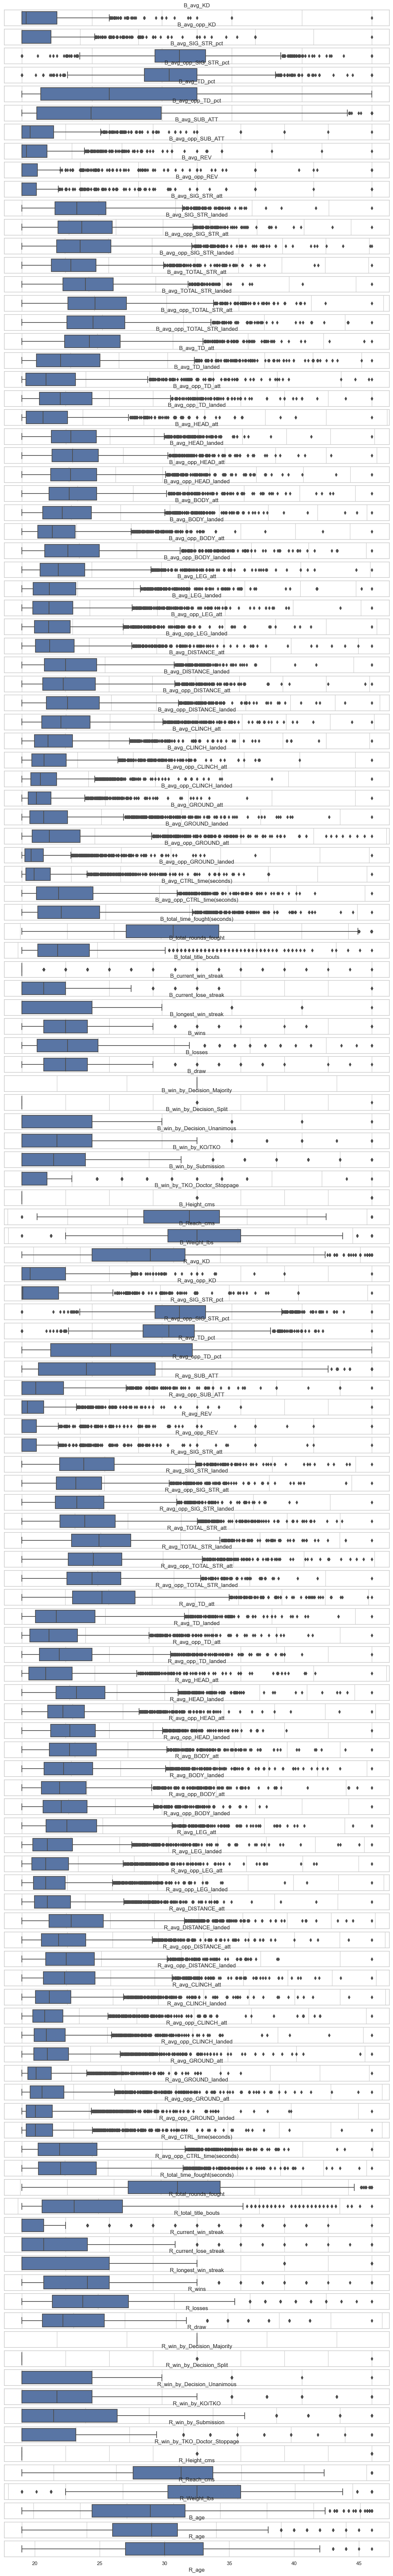

In [ ]:
# Boxplot of each numerical columns
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=1, figsize=(15, 100))

# Iterate through each numerical column and create a boxplot
for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(x=pre_processed_df[column], ax=axes[i])
    axes[i].set_title(column)

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorization
for column in numerical_columns.columns:
    df[column] = winsorize(pre_processed_df[column], (0, 0.05))


ValueError: Length of values (3480) does not match length of index (5410)

In [ ]:
# Get all numerical columns
numerical_columns = pre_processed_df.select_dtypes(include=['number'])

outliers = dict(check_outlier(numerical_columns).sum())
print("\n\npercentage of outliers in each column:")
for key in outliers.keys():
    print(f"{key} = {outliers[key]/numerical_columns[key].shape[0] * 100}%")


In [ ]:
# Boxplot of each numerical columns
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=1, figsize=(15, 100))

# Iterate through each numerical column and create a boxplot
for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(x=pre_processed_df[column], ax=axes[i])
    axes[i].set_title(column)


In [ ]:
# Min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(numerical_columns)
numerical_columns_scaled = scaler.transform(numerical_columns)
numerical_columns_scaled_df = pd.DataFrame(numerical_columns_scaled, columns=numerical_columns.columns)

numerical_columns_scaled_df.head()


# Classification

In [ ]:
numerical_columns_scaled_df.cop

# Clustering

In [ ]:
df = pd.read_csv("UFC_train.csv")
df.head()

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner
0,Joe Riggs,Joe Doerksen,Steve Mazzagatti,2004-08-21,"Las Vegas, Nevada, USA",False,Middleweight,NaN,NaN,NaN,...,0,0,0,Southpaw,182.88,177.80,185.0,26.0,21.0,Red
1,Jorge Masvidal,Al Iaquinta,Keith Peterson,2015-04-04,"Fairfax, Virginia, USA",False,Lightweight,1.156250,0.000000,0.394141,...,0,1,0,Orthodox,180.34,187.96,170.0,27.0,30.0,Blue
2,Dan Stittgen,Stephen Thompson,Josh Rosenthal,2012-02-04,"Las Vegas, Nevada, USA",False,Welterweight,NaN,NaN,NaN,...,0,0,0,Orthodox,185.42,NaN,170.0,28.0,31.0,Blue
3,Josh Koscheck,Johny Hendricks,Kevin Mulhall,2012-05-05,"East Rutherford, New Jersey, USA",False,Welterweight,0.695312,0.000000,0.783359,...,6,3,0,Orthodox,177.80,185.42,170.0,28.0,34.0,Blue
4,John Dodson,Manvel Gamburyan,James Warring,2016-04-16,"Tampa, Florida, USA",False,Bantamweight,0.500000,0.266602,0.381462,...,3,0,1,Orthodox,160.02,167.64,135.0,34.0,31.0,Red


In [ ]:
# Drop all rows that have missing values
df = df.dropna()

df.shape

(3480, 144)

In [ ]:
X = df.drop(['Winner'], axis=1)
y = df['Winner']

X.shape, y.shape

((3480, 143), (3480,))

<AxesSubplot:xlabel='Winner', ylabel='count'>

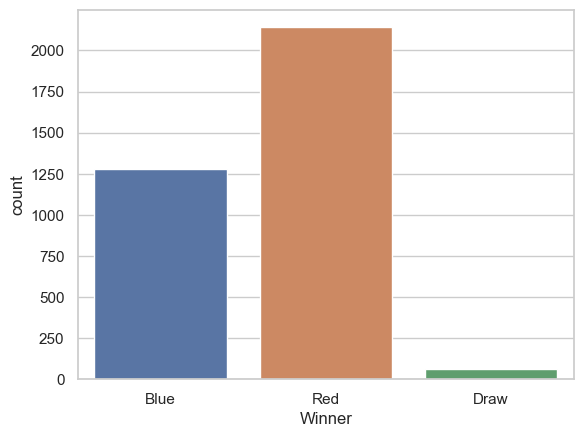

In [ ]:
sns.countplot(x='Winner', data=df)

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()


for column in X.columns:
    if X[column].dtype == np.number:
        continue
    X[column] = label_encoder.fit_transform(X[column])
y = label_encoder.fit_transform(y)

X.head()



/var/folders/53/kv053qr13vxg2_y_1lg6hjg80000gn/T/ipykernel_15917/1060276644.py:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if X[column].dtype == np.number:


,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
1,488,14,89,274,48,0,6,1.156250,0.000000,0.394141,...,4,0,1,0,1,180.34,187.96,170.0,27.0,30.0
3,497,564,93,169,46,0,8,0.695312,0.000000,0.783359,...,5,6,3,0,1,177.80,185.42,170.0,28.0,34.0
4,464,720,62,315,142,0,0,0.500000,0.266602,0.381462,...,2,3,0,1,1,160.02,167.64,135.0,34.0,31.0
6,918,631,179,238,71,0,6,0.000000,0.000000,0.470000,...,1,1,1,1,1,180.34,193.04,155.0,32.0,30.0
7,784,1142,108,313,26,0,8,0.500000,0.000000,0.460000,...,2,0,0,0,1,182.88,185.42,170.0,32.0,27.0


In [ ]:
from sklearn.cluster import KMeans

# Fighters physique features
physique_features = ['R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms', 'R_age', 'B_Height_cms', 'B_Weight_lbs', 'B_Reach_cms', 'B_age']

X_physique = df[physique_features]
y = df['Winner']

X.head()


,R_Height_cms,R_Weight_lbs,R_Reach_cms,R_age,B_Height_cms,B_Weight_lbs,B_Reach_cms,B_age
1,180.34,170.0,187.96,30.0,177.80,155.0,177.80,27.0
3,177.80,170.0,185.42,34.0,175.26,185.0,175.26,28.0
4,160.02,135.0,167.64,31.0,165.10,135.0,170.18,34.0
6,180.34,155.0,193.04,30.0,172.72,145.0,167.64,32.0
7,182.88,170.0,185.42,27.0,180.34,170.0,190.50,32.0


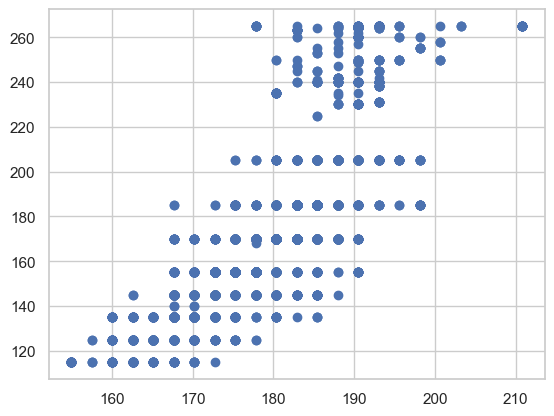

In [ ]:
plt.scatter(X_physique['R_Height_cms'], X_physique['R_Weight_lbs'])
plt.show()

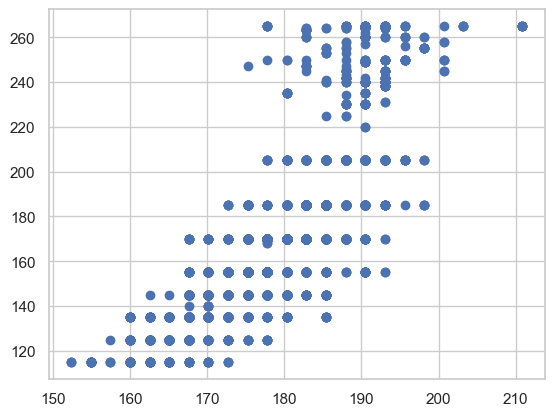

In [ ]:
plt.scatter(X_physique['B_Height_cms'], X_physique['B_Weight_lbs'])
plt.show()

### Fighters Physique Clustering
Kita di sini ingin menentukan clustering dari fisik para fighters dilihat dari fitur Height_cms dan Weight_lbs.
Bagaimana cara menentukan jumlah cluster yang optimal? Gunakan Elbow Method

#### Elbow Method
- Using the elbow method to find the optimal number of clusters. Let's use 1 to 11 as range of clusters.
- We will use 'random' initialization method for this study.


In [ ]:
X_clustering1 = X_physique[['R_Height_cms', 'R_Weight_lbs']]

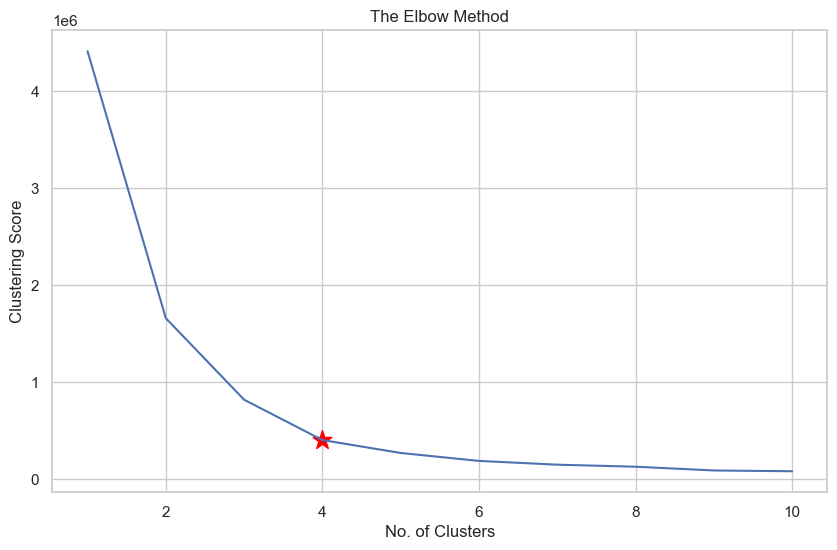

In [ ]:
clustering_scores = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(X_clustering1)
    clustering_scores.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_scores)
plt.scatter(4,clustering_scores[3], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()


Dapat dilihat dari plot, clustering scores melambat setelah 4 clusters. Kita dapat menggunakan K=4 untuk clustering.

In [ ]:
kmeans = KMeans(n_clusters=4, init='random', random_state=42)

kmeans.fit(X_clustering1)

pred = kmeans.predict(X_clustering1)


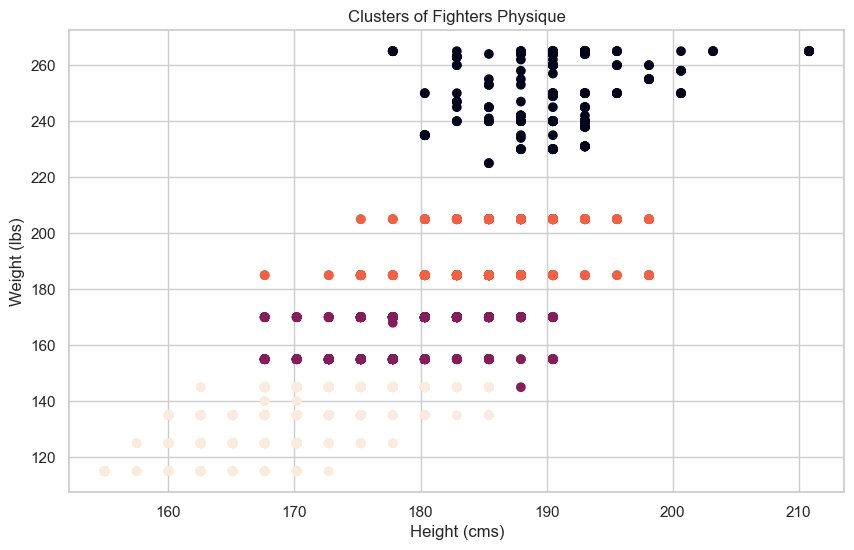

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10,6))
plt.scatter(X_clustering1['R_Height_cms'], X_clustering1['R_Weight_lbs'], c=pred)
plt.title('Clusters of Fighters Physique')
plt.xlabel('Height (cms)')
plt.ylabel('Weight (lbs)')
plt.show()

In [ ]:
X_clustering2 = X_physique[['B_Height_cms', 'B_Weight_lbs']]

kmeans.fit(X_clustering2)

pred = kmeans.predict(X_clustering2)


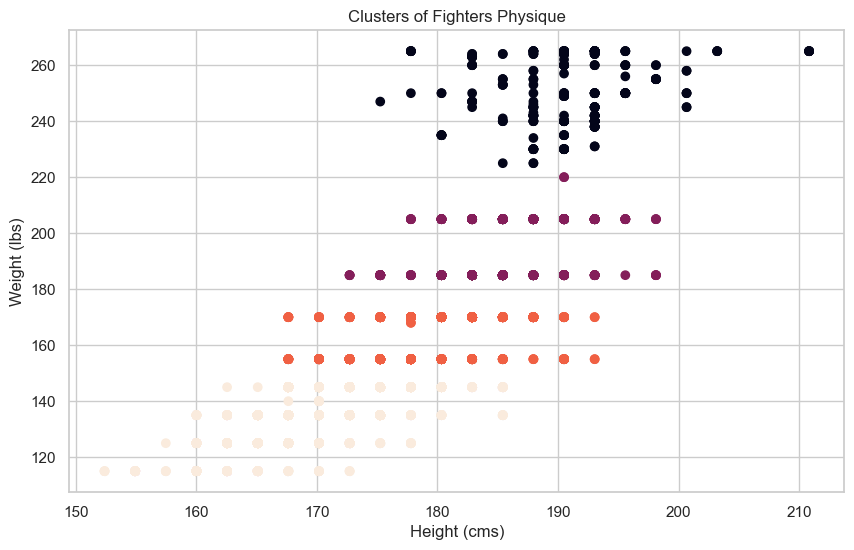

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10,6))
plt.scatter(X_clustering2['B_Height_cms'], X_clustering2['B_Weight_lbs'], c=pred)
plt.title('Clusters of Fighters Physique')
plt.xlabel('Height (cms)')
plt.ylabel('Weight (lbs)')
plt.show()